In [1]:
# Import packages.
from IPython.display import Image
import os, sys
sys.path.append(os.getcwd())
import datetime as dt
import numpy as np
from PIL import Image
import io
import requests
import csv
import query_utils

# Get query-instance for rasdaman
Rasdaman_Query = query_utils.Rasdaman_Query

rq = Rasdaman_Query()

%check_endpoint: Selected service endpoint 'https://ows.rasdaman.org/rasdaman/ows#/services' reached successfully.


In [2]:
co_coverage = "taiwan_air_quality_monitoring_data_co"
no2_coverage = "taiwan_air_quality_monitoring_data_no2"
o3_coverage = "taiwan_air_quality_monitoring_data_o3"

The query is...
 
for $co in (nchc.earthserver.xyz:7000:taiwan_air_quality_monitoring_data_co_8),
    $no2 in (nchc.earthserver.xyz:7000:taiwan_air_quality_monitoring_data_no2_8),
    $o3 in (nchc.earthserver.xyz:7000:taiwan_air_quality_monitoring_data_o3_8)

let $sub := [ansi(153403), X(147522.21879115:351672.21879115004083), Y(2422004.7731021:2799154.7731021)],
    $bands := {red:   ($co[ $sub ] - min($co[ $sub ])) / (max($co[ $sub ]) - min($co[ $sub ])) * 255; 
               green: ($no2[ $sub ] - min($no2[ $sub ])) / (max($no2[ $sub ]) - min($no2[ $sub ])) * 255; 
               blue:  ($o3[ $sub ] - min($o3[ $sub ])) / (max($o3[ $sub ]) - min($o3[ $sub ])) * 255 }

return 
   encode(
     crsTransform(
        scale(
           (unsigned char) ($bands),

           { 
             X:"CRS:1"(0:300)
           } 
        ),
        
        { 
             X: "https://ows.rasdaman.org/def/crs/EPSG/0/4326",    
             Y: "https://ows.rasdaman.org/def/crs/EPSG/0/4326"
        }

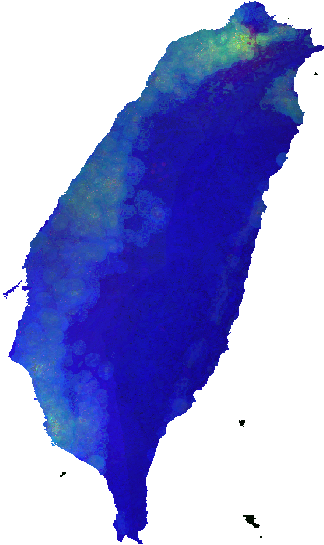

In [3]:
query = """
for $co in (nchc.earthserver.xyz:7000:taiwan_air_quality_monitoring_data_co_8),
    $no2 in (nchc.earthserver.xyz:7000:taiwan_air_quality_monitoring_data_no2_8),
    $o3 in (nchc.earthserver.xyz:7000:taiwan_air_quality_monitoring_data_o3_8)

let $sub := [ansi(153403), X(147522.21879115:351672.21879115004083), Y(2422004.7731021:2799154.7731021)],
    $bands := {red:   ($co[ $sub ] - min($co[ $sub ])) / (max($co[ $sub ]) - min($co[ $sub ])) * 255; 
               green: ($no2[ $sub ] - min($no2[ $sub ])) / (max($no2[ $sub ]) - min($no2[ $sub ])) * 255; 
               blue:  ($o3[ $sub ] - min($o3[ $sub ])) / (max($o3[ $sub ]) - min($o3[ $sub ])) * 255 }

return 
   encode(
     crsTransform(
        scale(
           (unsigned char) ($bands),

           { 
             X:"CRS:1"(0:300)
           } 
        ),
        
        { 
             X: "https://ows.rasdaman.org/def/crs/EPSG/0/4326",    
             Y: "https://ows.rasdaman.org/def/crs/EPSG/0/4326"
        }  
    ),   
         
    "image/png",  
    "nodata=0")
"""
params = { "query" : query }

# submit the query...
response = rq.get_query(query, credentials="")

# display the result
img = Image.open(response)
display(img)